In [1]:
import numpy as np # MATHEMATICAL COMPUTATION
import matplotlib.pyplot as plt # PLOTING 
from scipy.io.wavfile import read, write # .WAV EXTENSION FILE READ AND WRITE 
from IPython.display import Audio # AUDIO DISPLAY 
%matplotlib inline 

C:\Users\vivek\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fs,data=read('Free_Test_Data_500KB_WAV.wav') 
# fs--> sampling frequency 
# data --> sample amplitude
data=data[:,0] # stereo --> 2 channel 
# mon0 channel
print('sampling Frequency is', fs)

sampling Frequency is 44100


### play audio

In [3]:
Audio(data,rate=fs) # origional file 

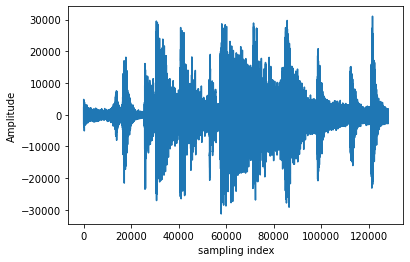

In [4]:
plt.figure()
plt.plot(data)
plt.xlabel('sampling index')
plt.ylabel('Amplitude')
plt.show()

In [5]:
from scipy import signal
from scipy.signal import butter, lfilter
# butter-worth --> IIR filter
def bandpass_filter(data, lowcut, highcut, fs, order=10):
    global b
    global a
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b,a = butter(order, [low, high], btype='bandpass')
    print(b,a)
    
    filtered = lfilter(b, a, data)  # applying bandpass filter on data
    return filtered

def equalizer_6band (data, fs, gain1,gain2,gain3,gain4,gain5,gain6):
    band1 = bandpass_filter(data, 16, 60, fs, order=3)*10**(gain1/20) #Sub-Bass (16 Hz to 60 Hz).
    band2 = bandpass_filter(data, 60, 250, fs, order=3)*10**(gain2/20) #Bass (60 Hz to 250 Hz). 
    band3 = bandpass_filter(data, 250, 2000, fs, order=3)*10**(gain3/20) #Low Mids (250 Hz to 2 kHz).
    band4 = bandpass_filter(data, 2000, 4000, fs, order=3)*10**(gain4/20) #High Mids (2 kHz to 4 kHz)
    band5 = bandpass_filter(data, 4000, 6000, fs, order=3)*10**(gain5/20) #Presence (4 kHz to 6 kHz).
    band6 = bandpass_filter(data, 6000, 16000, fs, order=3)*10**(gain6/20) #Brilliance (6 kHz to 16 kHz).

    signal = band1+ band2 + band3 + band4 + band5 + band6
    return signal

In [6]:
N=len(data)
t  = 1/fs * np.arange(N) 
f  = fs/N * np.arange(N)

In [7]:
F_data = np.fft.fft(data)/N


In [8]:
equalized = equalizer_6band(data, fs,-20,-20,-20,-20,10,-20)

[ 3.06036747e-08  0.00000000e+00 -9.18110240e-08  0.00000000e+00
  9.18110240e-08  0.00000000e+00 -3.06036747e-08] [  1.          -5.9874038   14.93715633 -19.87458653  14.87485967
  -5.93756604   0.98754038]
[ 2.41388919e-06  0.00000000e+00 -7.24166756e-06  0.00000000e+00
  7.24166756e-06  0.00000000e+00 -2.41388919e-06] [  1.          -5.94495556  14.7271715  -19.45907752  14.46375994
  -5.73419548   0.94729713]
[ 0.00153269  0.         -0.00459807  0.          0.00459807  0.
 -0.00153269] [  1.          -5.47452215  12.52611385 -15.33645073  10.59923471
  -3.92091883   0.60654398]
[ 0.0022177  0.        -0.0066531  0.         0.0066531  0.
 -0.0022177] [  1.          -4.99383506  10.78081957 -12.84534759   8.90556602
  -3.40851737   0.56446738]
[ 0.0022177  0.        -0.0066531  0.         0.0066531  0.
 -0.0022177] [ 1.         -4.15300293  8.20603255 -9.48469644  6.78025789 -2.83461156
  0.56446738]
[ 0.13246609  0.         -0.39739826  0.          0.39739826  0.
 -0.13246609] [ 1

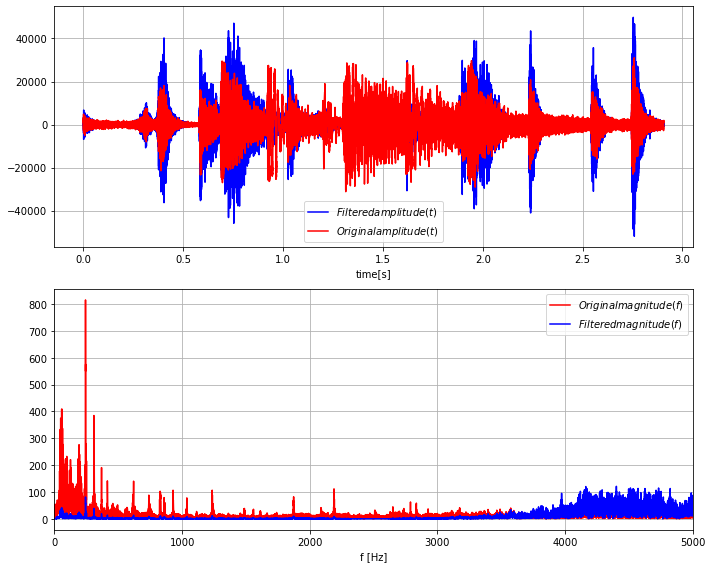

In [9]:
Y = np.fft.fft(equalized)/N

plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(t, equalized,'-b',label=r"$Filtered amplitude(t)$")
plt.xlabel('time[s]')
plt.subplot(2,1,1)
plt.plot(t, data,'-r',label=r"$Original amplitude(t)$")
plt.xlabel('time[s]')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(f[:N//2],np.abs(F_data[:N//2]),'-r',label=r"$Original magnitude(f)$")
plt.xlabel('f [Hz]')
plt.xlim([0,5e3])
plt.plot(f[:N//2],np.abs(Y[:N//2]),'-b',label=r"$Filtered magnitude(f)$")
plt.xlabel('f [Hz]')
plt.xlim([0,5e3])
plt.legend()
plt.tight_layout()
plt.grid()


In [10]:
print(data)

[2287 2137 1074 ... 1426 1437 1332]


In [11]:
print(equalized)

[  47.19196961  115.62655488   97.63292753 ... -246.37352237  311.62219666
  726.54504408]


In [12]:
write("example.wav",fs,equalized.astype(np.float32))

In [13]:
Audio(equalized,rate=fs)

In [14]:
final=data+equalized

In [15]:
Audio(final,rate=fs)